In [345]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
# read data/train image folder
# read gray scale image
train_A = []
train_B = []
train_C = []
test_A = []
test_B = []
test_C = []
# read data/train/A, data/train/B, data/train/C and store them in train_A, train_B, train_C respectively
for file in glob.glob("data/train/A/*.png"):
    train_A.append((cv2.imread(file,cv2.IMREAD_GRAYSCALE)).reshape(-1,1)/255)
for file in glob.glob("data/train/B/*.png"):
    train_B.append(cv2.imread(file,cv2.IMREAD_GRAYSCALE).reshape(-1,1)/255)
for file in glob.glob("data/train/C/*.png"):
    train_C.append(cv2.imread(file,cv2.IMREAD_GRAYSCALE).reshape(-1,1)/255)

# read data/test/A, data/test/B, data/test/C and store them in test_A, test_B, test_C respectively
for file in glob.glob("data/test/A/*.png"):
    test_A.append(cv2.imread(file,cv2.IMREAD_GRAYSCALE).reshape(-1,1)/255)
for file in glob.glob("data/test/B/*.png"):
    test_B.append(cv2.imread(file,cv2.IMREAD_GRAYSCALE).reshape(-1,1)/255)
for file in glob.glob("data/test/C/*.png"):
    test_C.append(cv2.imread(file,cv2.IMREAD_GRAYSCALE).reshape(-1,1)/255)

In [346]:
# create X_train, X_test and Y_train, Y_test
X_train = np.array(train_A + train_B + train_C)
X_test = np.array(test_A + test_B + test_C)
Y_train = np.array([1]*len(train_A) + [-1]*len(train_B) + [-1]*len(train_C))
Y_test = np.array([1]*len(test_A) + [-1]*len(test_B) + [-1]*len(test_C))


In [347]:
X_test[0]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.02745098],
       [0.63529412],
       [0.60392157],
       [0.00784314],
       [0.        ],
       [0.07058824],
       [0.40392157],
       [0.6627451 ],
       [0.76078431],
       [0.73333333],
       [0.68627451],
       [0.67843137],
       [0.68627451],
       [0.18431373],
       [0.00392157],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01176471],
       [0.        ],
       [0.62745098],
       [1.        ],
       [0.24313725],
       [0.00392157],
       [0.01176471],
       [0.03529412],
       [0.18823529],
       [0.44705882],
       [0.8       ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.63137255],
       [0.        ],
       [0.01176471],
       [0.   

### Question 1
The input space X and output space Y : $$ X = [0,255]^{3}$$
$$ Y = \set{-1,1} $$



### Question 2
#### 2-a
For a label (X,Y) we define the 3 losses :
Square loss : $$ L_{1}(f_{\theta}(X_{i}),Y_{i}) = (f_{\theta}(X{i})-Y_{i})^{2} $$
Logistic loss : $$ L_{2}(f_{\theta}(X_{i}),Y_{i}) = \log(1+e^{-Y_{i}f_{\theta}(X_{i})}) $$
Empirical error associated with 0-1 loss :  $$ E_{0-1}(f_{\theta}) = \frac{1}{n}\sum_{i=1}^{n}L_{3}(f_{\theta}(X_{i}),Y_{i}) =  \frac{1}{n}\sum_{i=1}^{n}\mathbb{1}_{f_{\theta}(X_{i})\neq Y_{i}} $$
True risk of 0-1 loss :  $$ R_{0-1}(f) = \mathbb{E}_{(X,Y)\sim P_{data}}[L_{3}(f(x),y)] = \mathbb{E}_{(X,Y)\sim P_{data}}[\mathbb{1}_{f(X)\neq Y}] $$
It's hard to minimize the 0-1 empirical risk because the  0-1 loss is not differentiable. We can minimize the 0-1 empirical risk by using the 0-1 hinge loss :  $$ L_{4}(f_{\theta}(X_{i}),Y_{i}) = \max(0,1-Yf_{\theta}(X_{i})) $$

#### 2-b
We use the test data to assess performance because we want to know how well the model will perform on new data. This is necessary because otherwise we would be overfitting to the training data. So the test data should be independent of the training data.


#### 2-c
Optimization problems :  

For the linear least square regression : $$ \min_{\theta} \frac{1}{n}\sum_{i=1}^{n}(f_{\theta}(X_{i})-Y_{i})^{2} $$
For the linear logistic regression : $$ \min_{\theta} \frac{1}{n}\sum_{i=1}^{n}\log(1+e^{-Y_{i}f_{\theta}(X_{i})}) $$

#### 2-d
 Under the regression model with Y in $\set{-1,1}$, 
 $$ P(Y=1|X) = \frac{1}{1+e^{-f_{\theta}(X)}} $$
 whith $f_{\theta}(X) = \theta^{T}X$ in linear logistic regression.
[Click here to see sigmoid fct](./sigmoid.png)

#### 2-e
First, we choose the logistic loss  $ P(Y=1|X) = \frac{1}{1+e^{-f_{\theta}(X)}} $
because it maps the output of the linear regression to the probability of the label being 1. 
Link betwwen logistic regression and maximum likelihood  : $$ \max_{\theta} \mathbb{P}(Y|X) = \max_{\theta} \prod_{i=1}^{n}P(Y_{i}|X_{i}) = \max_{\theta} \prod_{i=1}^{n}\frac{1}{1+e^{-Y_{i}f_{\theta}(X_{i})}} $$

We work with log likelihood because it's easier to derive the gradient. The formula of log likelihood is :
$$ \log(\mathbb{P}(Y|X)) = \sum_{i=1}^{n}\log(P(Y_{i}|X_{i})) = \sum_{i=1}^{n}\log(\frac{1}{1+e^{-Y_{i}f_{\theta}(X_{i})}}) = -nloss(Y,X) $$
So maximizing the likelihood is equivalent to minimizing the logistic loss.
 

### Question 3
In the least square polynomial regression. As we increase the degree of the polynomial, bias decrease and variance increase. Then at some point, the bias increase and the variance decrease. This is because the model is overfitting the data. So the answer is bias, the curve of bias-variance tradeoff is U-shaped.



### Question 4
Let's take $ f_{ \theta}(x) = <\theta,x>$ as the hypothesis function. Let's write the SGD update rule for different algortihms :
For the logistic regression : $$ \theta_{t+1} = \theta_{t} - \eta \nabla_{\theta} \log(1+e^{-Y_{i}f_{\theta}(X_{i})}) = \theta_{t} + \eta Y_{i}f'_{\theta}(X_{i}) \frac{e^{-Y_{i}f_{\theta}(X_{i})}}{1+e^{-Y_{i}f_{\theta}(X_{i})}} $$
For the linear regression : $$ \theta_{t+1} = \theta_{t} - \eta \nabla_{\theta} (f_{\theta}(X_{i})-Y_{i})^{2} = \theta_{t} + 2\eta (f_{\theta}(X_{i})-Y_{i})X_{i} $$
For the perceptron algorithm : $$ \theta_{t+1} = \theta_{t} - \eta \nabla_{\theta} \max(0,1-Yf_{\theta}(X_{i})) = \theta_{t} + \eta Y_{i}X_{i} \mathbb{1}_{Y_{i}f_{\theta}(X_{i})\lneq 0} $$

In [348]:
X_train[0].shape

(784, 1)

### Question 5:
We will implement the SGD algorithm to solve specific problems.


In [349]:
def logistic_loss_gradient(X_i, Y_i, w):
    # multiply weight vector with image vector
    return -(Y_i*X_i*np.exp(-Y_i*np.dot(w.T,X_i)))/(1+np.exp(-Y_i*np.dot(w.T,X_i)))
def logistic_loss(X, Y, w):
    loss = 0
    for i in range(len(X)):
        loss += np.log(1+np.exp(-Y[i]*np.dot(w.T,X[i])))
    return float(loss/len(X))
 # define OLS loss gradient
def OLS_loss_gradient(X_i, Y_i, w):
    return -2*(Y_i-np.dot(w.T,X_i))*X_i
def OLS_loss(X, Y, w):
    loss = 0
    for i in range(len(X)):
        loss += (Y[i]-np.dot(w.T,X[i]))**2
    return float(loss/len(X))
# define 0-1 loss gradient
def zero_one_loss_gradient(X_i, Y_i, w):
    return -Y_i*X_i if Y_i*np.dot(w.T,X_i) <= 0 else 0
def zero_one_loss(X, Y, w):
    loss = 0
    for i in range(len(X)):
        loss += 1 if Y[i]*np.dot(w.T,X[i]) <= 0 else 0
    return float(loss/len(X))
# define perceptron loss gradient
def perceptron_weight_gradient(X_i, Y_i, w,b):
    return -Y_i*X_i if Y_i*(np.dot(w.T,X_i)+b) <= 0 else 0
def perceptron_bias_gradient(X_i, Y_i, w,b):
    return -Y_i if Y_i*(np.dot(w.T,X_i)+b) <= 0 else 0
def perceptron_loss(X, Y, w,b):
    loss = 0
    for i in range(len(X)):
        loss += 1 if Y[i]*(np.dot(w.T,X[i])+b) < 0 else 0
    return float(loss/len(X))

100%|██████████| 12000/12000 [00:05<00:00, 2064.74it/s]


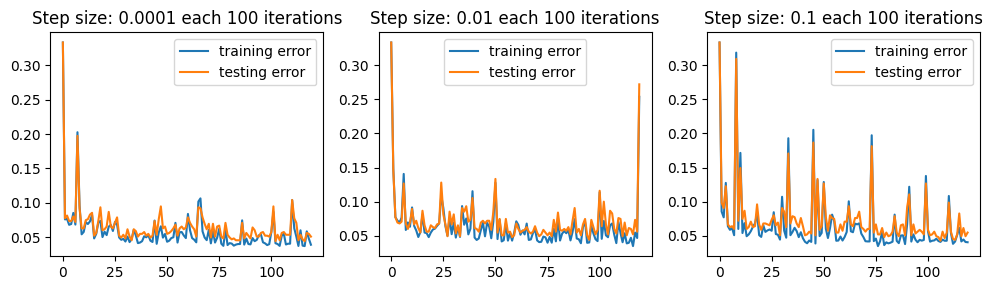

In [379]:
# import shuffle function
from tqdm import tqdm

#p SGD implementation for logistic regression to get training and testing error
# define well crafted step sizes for our SGD
step_sizes = [0.0001,0.01,0.1]
subplots = len(step_sizes) 
fig, axs = plt.subplots(1,subplots)
# choose size of figure
fig.set_size_inches(10, 3)
# do SGD for different number of iterations
nbr_of_iterations = 12000
for j in range(subplots):
    step_size = step_sizes[j]
    w = np.zeros_like(X_train[0])
    b = 0
    train_error = []
    test_error = []
    for i in tqdm(range(nbr_of_iterations)) :
        # choose a random index
        index = np.random.randint(0,len(X_train))
        # update weight using SGD
        w,b = w-step_size*perceptron_weight_gradient(X_train[index],Y_train[index],w,b),b-step_size*perceptron_bias_gradient(X_train[index],Y_train[index],w,b)
        if i% 100 == 0 : # compute training and testing error each 100 iterations
            train_error.append(perceptron_loss(X_train,Y_train,w,b))
            test_error.append(perceptron_loss(X_test,Y_test,w,b))
            
    # plot both training and testing error on the same figure in first row    
    axs[j].plot(train_error, label="training error")
    axs[j].set_title("Step size: " + str(step_size)+ " each 100 iterations")
    # add legend
    axs[j].plot(test_error, label="testing error")
    axs[j].legend()
    # axs[j,0].set_title("Test error for step size: " + str(step_size))
fig.tight_layout()
        

## Question 5:

### Logistic Weights

100%|██████████| 10000/10000 [00:00<00:00, 31724.46it/s]


4


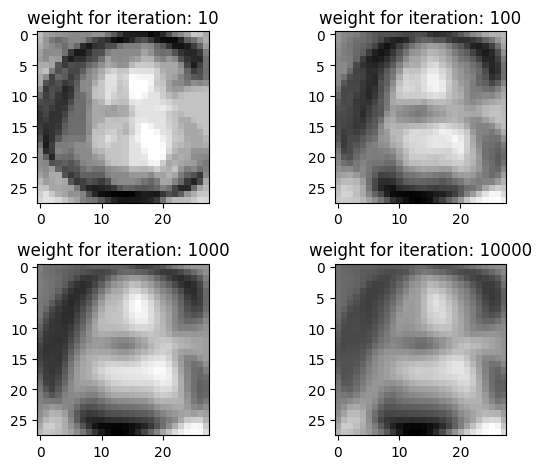

In [351]:
step_size = 0.0001  
nbr_of_iterations = 10000
set_iterations = [10,100,1000,10000]
weights = []
w = np.zeros_like(X_train[0])
train_error = []
test_error = []

for i in tqdm(range(1,nbr_of_iterations+1)) :
    #choose random sample from X_train and Y_train
    index = np.random.randint(0,len(X_train))
    # update weight using SGD 
    w = w - step_size*logistic_loss_gradient(X_train[index], Y_train[index], w)   
    if i in set_iterations:
        weights.append(w)
print(len(weights))
# plot the 4 weights as images in 2*2 grid
fig, axs = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(weights[i*2+j].reshape(28,28), cmap='gray')
        axs[i,j].set_title("weight for iteration: " + str(set_iterations[i*2+j]))
fig.tight_layout() 

### OLS loss :

100%|██████████| 10000/10000 [00:00<00:00, 54030.74it/s]


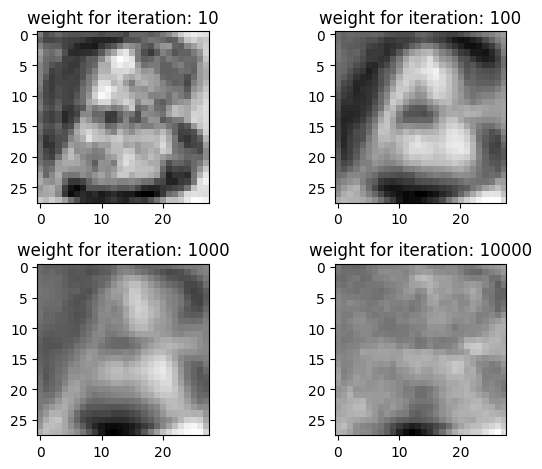

In [352]:
step_size = 0.0001  
nbr_of_iterations = 10000
set_iterations = [10,100,1000,10000]
weights = []
w = np.zeros_like(X_train[0])
train_error = []
test_error = []

for i in tqdm(range(1,nbr_of_iterations+1)) :
    index = np.random.randint(0,len(X_train))
    w = w - step_size*OLS_loss_gradient(X_train[index], Y_train[index], w)   
    if i in set_iterations:
        weights.append(w)
# plot the 4 weights as images in 2*2 grid
fig, axs = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(weights[i*2+j].reshape(28,28), cmap='gray')
        axs[i,j].set_title("weight for iteration: " + str(set_iterations[i*2+j]))
fig.tight_layout() 

### Perceptron  loss :

100%|██████████| 10000/10000 [00:00<00:00, 21459.26it/s]


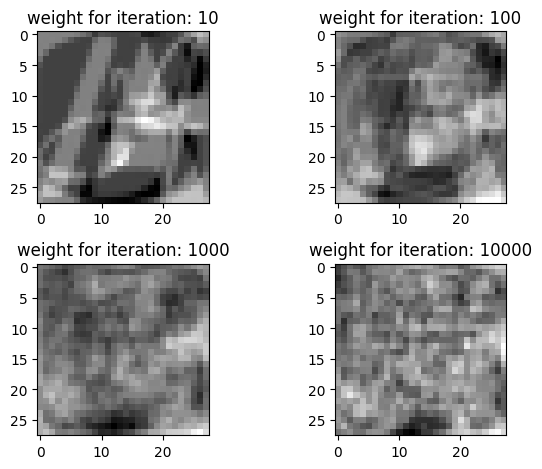

In [336]:
step_size = 0.0001  
nbr_of_iterations = 10000
set_iterations = [10,100,1000,10000]
weights = []
biases = []
w = np.zeros_like(X_train[0])
b = 0
train_error = []
test_error = []
# SGD for perceptron
for i in tqdm(range(1,nbr_of_iterations+1)) :
    index = np.random.randint(0,len(X_train))  
    # vary w,b simultaneously
    w,b = w - step_size*perceptron_weight_gradient(X_train[index], Y_train[index], w,b),b - step_size*perceptron_bias_gradient(X_train[index], Y_train[index], w,b)
    if i in set_iterations:
        weights.append(w)
        biases.append(b)
# plot the 4 weights as images in 2*2 grid
fig, axs = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(weights[i*2+j].reshape(28,28), cmap='gray')
        axs[i,j].set_title("weight for iteration: " + str(set_iterations[i*2+j]))
fig.tight_layout()  

## Question 6 : KNN

K-nearest neighbors classifier takes on  the label of the majority of its k nearest neighbors. The distance between two points is the Euclidean distance. The algorithm is as follows : 
1. For each test point, find the k nearest neighbors in the training set using the Euclidean distance
2. Assign the label of the majority of the k nearest neighbors to the test point.
 
  
 

In [363]:
X_test.shape

(750, 784, 1)

In [364]:
# convert the data to 1D array
X_train_1D = X_train.reshape(X_train.shape[0], -1)
X_test_1D = X_test.reshape(X_test.shape[0], -1)

In [366]:
X_train_1D.shape

(6000, 784)

In [365]:
X_test_1D.shape

(750, 784)

In [367]:
# apply KNN for certain k 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def apply_knn(k,X_train,Y_train,X_test,Y_test):
    # apply KNN and return training and testing error
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_train_pred = knn.predict(X_train)
    Y_test_pred = knn.predict(X_test)
    train_error = 1-accuracy_score(Y_train, Y_train_pred)
    test_error = 1-accuracy_score(Y_test, Y_test_pred)
    return train_error,test_error
    


In [375]:
# test the function for multiple k values
train_error = []
test_error = []
max_k = 10 # square root of number of training samples
for k in tqdm(range(1,max_k)):
    train_error_k,test_error_k = apply_knn(k,X_train_1D,Y_train,X_test_1D,Y_test)
    train_error.append(train_error_k)
    test_error.append(test_error_k)
    

100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


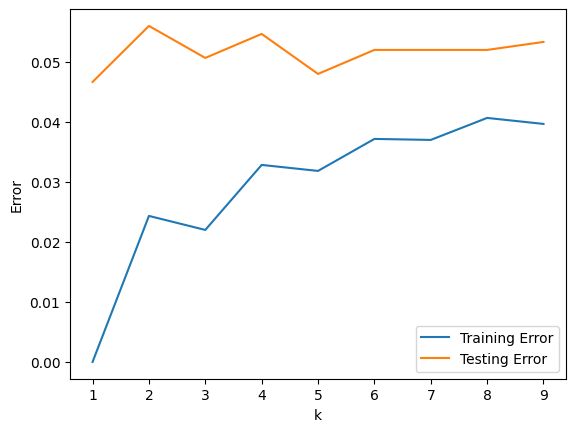

In [376]:
# plot training and testing error for different k values on the same plot
plt.plot(range(1, 10), train_error, label='Training Error')
plt.plot(range(1, 10), test_error, label='Testing Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

In [377]:
# perform 5-fold cross validation for KNN to select the best k
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# create a new KNN model
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 10)}
# use gridsearch 
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
# fit model to data
knn_gscv.fit(X_train_1D, Y_train)
# check top performing n_neighbors value
print(knn_gscv.best_params_)
# check score for best k
print(knn_gscv.best_score_)

{'n_neighbors': 3}
0.9538333333333334
[0.94516667 0.95066667 0.95383333 0.95116667 0.95316667 0.95
 0.95066667 0.94783333 0.94833333]


### Question 7 : MLP 

In [265]:
# Given a multi-layer perceptron with 1 input layer containing 28 ×28 neurons, 1 hidden layer containing 32 neurons, and 1 output layer containing 3 neurons (one for each class)
number_of_parameters = 28*28*32 + 32 + 32*3 + 3
print("Number of parameters: ", number_of_parameters)
# transform labels in one hot encording depending on the label index(0 if between 0 and 2000, 1 if between 2000 and 4000, 2 if between 4000 and 6000)
Y_train_one_hot = np.zeros((len(Y_train), 3))
Y_test_one_hot = np.zeros((len(Y_test), 3))
Y_train_one_hot[0:2000,:] = [1,0,0]
Y_train_one_hot[2000:4000,:] = [0,1,0]
Y_train_one_hot[4000:,:] = [0,0,1]
Y_test_one_hot[0:2000,:] = [1,0,0]
Y_test_one_hot[2000:4000,:] = [0,1,0]
Y_test_one_hot[4000:,:] = [0,0,1]

# implement the neural network using tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
# model by adding reLU activation function to the hidden layer
def build_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(28*28,)))
    model.add(Dense(3, activation='softmax')) 
    return model

# use it on the training data and report empirical training error(0-1 loss) and testing error(0-1 loss)
model = build_model()
model.compile(optimizer='sgd', loss= 'categorical_crossentropy')
model.fit(X_train, Y_train_one_hot, epochs=20, batch_size=16, verbose=1)
train_prediction = model.predict(X_train)
train_prediction = np.argmax(train_prediction, axis=1)
test_prediction = model.predict(X_test)
test_prediction = np.argmax(test_prediction, axis=1)
# compute 0-1 loss
train_error = 0
test_error = 0
for i in range(len(train_prediction)):
    if (train_prediction[i] == 0 and Y_train_one_hot[i][0] != 1) or (train_prediction[i] != 0 and Y_train_one_hot[i][0] == 1) : # we penalize only if first class was not correctly predicted
        train_error += 1
for i in range(len(test_prediction)):
    if (test_prediction[i] == 0 and Y_test_one_hot[i][0] != 1) or (test_prediction[i] != 0 and Y_test_one_hot[i][0] == 1) :
        test_error += 1
print("Training error: ", train_error/len(train_prediction))
print("Testing error: ", test_error/len(test_prediction))


Number of parameters:  25219
Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3460
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2156
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1965
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1854
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1771
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1681
Epoch 7/20
375/375 [==============================] - 1s 1ms/step - loss: 0.1625
Epoch 8/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1561
Epoch 9/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1521
Epoch 10/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1477
Epoch 11/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1432
Epoch 12/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1

### Question 8 : Create a table with empirical error and test error(0-1 loss) for each model(logistic regression, OLS, perceptron, KNN, MLP) 


### Question 9 : L2 regularisation to question 5 models

It's important to regularize because it prevents overfitting. We can regularize using L2 norm by adding a term to the loss function. The new loss function is : $$ L_{reg} = L + \lambda \sum_{i=1}^{d} \theta_{i}^{2} $$

For OLS, the update rule with L2 regularisation is : $$ \theta_{t+1} = \theta_{t} + 2\eta (f_{\theta}(X_{i})-Y_{i})X_{i} - 2\eta \lambda \theta_{t} $$
For logistic regression, the update rule with L2 regularisation is : $$ \theta_{t+1} = \theta_{t} + \eta Y_{i}f'_{\theta}(X_{i}) \frac{e^{-Y_{i}f_{\theta}(X_{i})}}{1+e^{-Y_{i}f_{\theta}(X_{i})}} - 2\eta \lambda \theta_{t} $$
For perceptron, the update rule with L2 regularisation is : $$ \theta_{t+1} = \theta_{t} + \eta Y_{i}X_{i} \mathbb{1}_{Y_{i}f_{\theta}(X_{i})\lneq 0} - 2\eta \lambda \theta_{t} $$